# Chapter 5 Support Vector Machines 
## Linear SVM Classification 

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

%matplotlib inline
import matplotlib as mpl 
import matplotlib.pyplot as plt 
mpl.rc('axes',labelsize = 14) 
mpl.rc('xtick',labelsize = 12)
mpl.rc('ytick',labelsize = 12)

iris = datasets.load_iris()

In [2]:
x = iris["data"][:,(2,3)]
y = (iris["target"]==2).astype(np.float64)


In [3]:
svm_clf = Pipeline([
    ("scaler", StandardScaler()), 
    ("linear_svc",LinearSVC(C=1,loss="hinge"))
])
svm_clf.fit(x,y)



Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linear_svc', LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0))])

In [4]:
svm_clf.predict([[5.5,1.7]])

array([1.])

## Nonlinear SVM Classification

In [5]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

x,y = make_moons(n_samples=100,noise=0.15,random_state=42)
polynomial_svm_clf = Pipeline([
        ("poly_features", PolynomialFeatures(degree=3)),
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(C=10, loss="hinge", random_state=42))
    ])

polynomial_svm_clf.fit(x, y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline(memory=None,
     steps=[('poly_features', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', LinearSVC(C=10, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=42, tol=0.0001, verbose=0))])

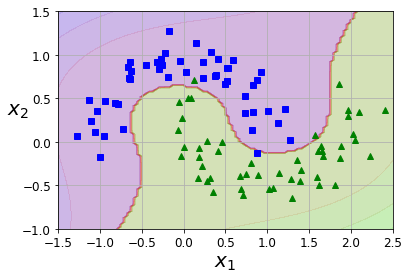

In [6]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

def plot_dataset(x,y,axes): 
    plt.plot(x[:,0][y==0],x[:,1][y==0],"bs")
    plt.plot(x[:,0][y==1],x[:,1][y==1],'g^')
    plt.axis(axes)
    plt.grid(True,which="both") 
    plt.xlabel(r"$x_1$",fontsize = 20)
    plt.ylabel(r"$x_2$",fontsize = 20, rotation=0)

plot_predictions(polynomial_svm_clf,[-1.5,2.5,-1,1.5]) 
plot_dataset(x,y,[-1.5,2.5,-1,1.5])

## Polynomial Kernel 

In [7]:
from sklearn.svm import SVC 
poly_kernel_svm_clf = Pipeline([
    ("scaler",StandardScaler()),
    ("svm_clf",SVC(kernel="poly",degree=3,coef0=1,C=5))
])

In [8]:
poly_kernel_svm_clf.fit(x,y)

poly100_kernel_svm_clf = Pipeline([
    ("scaler",StandardScaler()),
    ("svm_clf",SVC(kernel="poly",degree=10,coef0=100,C=5))
])
poly100_kernel_svm_clf.fit(x,y) 

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', SVC(C=5, cache_size=200, class_weight=None, coef0=100,
  decision_function_shape='ovr', degree=10, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))])

Text(0.5, 1.0, '$d=10,r=100,c=5$')

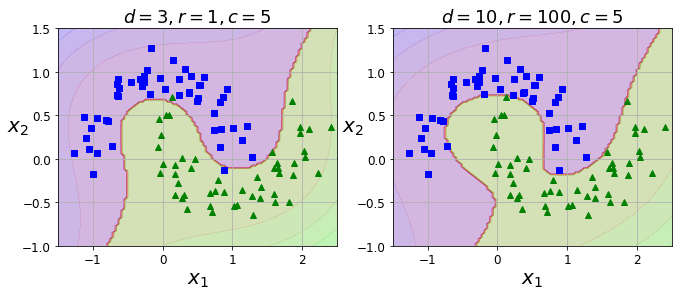

In [9]:
plt.figure(figsize=(11,4))
plt.subplot(121) 
plot_predictions(poly_kernel_svm_clf,[-1.5,2.5,-1,1.5])
plot_dataset(x,y,[-1.5,2.5,-1,1.5])
plt.title(r"$d=3,r=1,c=5$",fontsize = 18) 

plt.subplot(122) 
plot_predictions(poly100_kernel_svm_clf,[-1.5,2.5,-1,1.5])
plot_dataset(x,y,[-1.5,2.5,-1,1.5])
plt.title(r"$d=10,r=100,c=5$",fontsize = 18)

## SVC 

C-Support Vector Classification. The fit time complexity is more than quadratic with the number of samples which makes it hard to scale to dataset with more than 10000 samples. 

### What is coef in svc? 


## Adding Similarity Features

## SVM Regression 
SVM can be used for regression purpose as well, in addition to classification. For classification, it is like fitting a wide street between the data. For regression, it is like fitting data within the data. 

In [10]:
from sklearn.svm import LinearSVR
svm_reg = LinearSVR(epsilon=1.5) 
svm_reg.fit(x,y)

LinearSVR(C=1.0, dual=True, epsilon=1.5, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=None, tol=0.0001, verbose=0)

In [12]:
rbf_kernel_svm_clf = Pipeline([
    ("scaler",StandardScaler()), 
    ("svm_clf",SVC(kernel="rbf",gamma=5,C=0.001))
])


In [13]:
x.shape

(100, 2)

In [14]:
rbf_kernel_svm_clf.fit(x,y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=5, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

Text(0.5, 1.0, '$\\gamma=5,C=1000$')

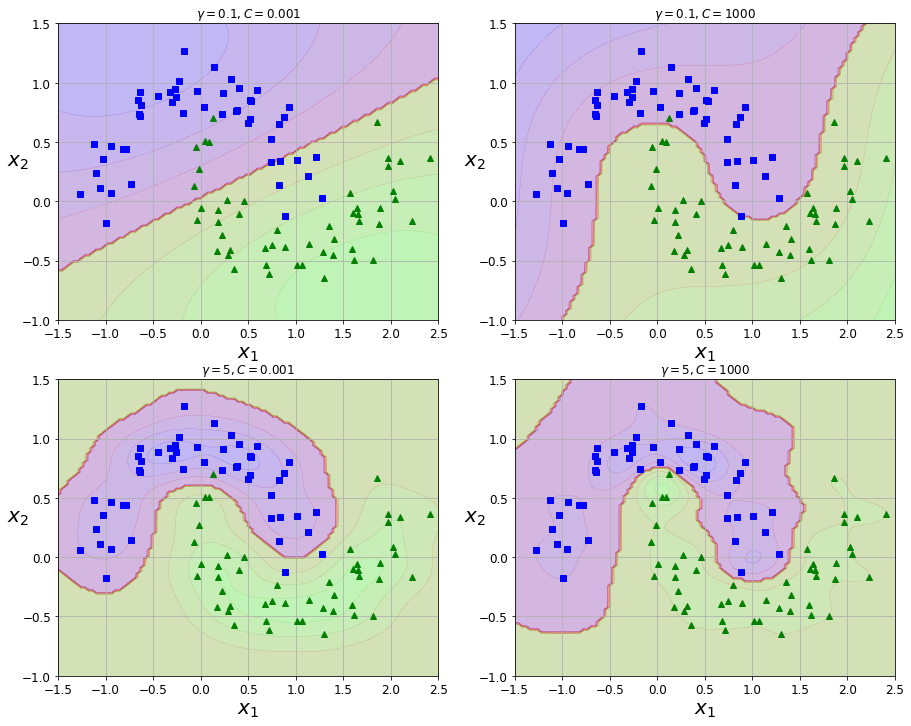

In [22]:
gamma1=0.1
gamma2=5
C1=0.001
C2=1000
rbf_kernel_svm_clf_gamma1_C1 = Pipeline([
    ("scaler",StandardScaler()), 
    ("svm_clf",SVC(kernel="rbf",gamma=gamma1,C=C1))
])
rbf_kernel_svm_clf_gamma1_C1.fit(x,y)

rbf_kernel_svm_clf_gamma1_C2 = Pipeline([
    ("scaler",StandardScaler()), 
    ("svm_clf",SVC(kernel="rbf",gamma=gamma1,C=C2))
])
rbf_kernel_svm_clf_gamma1_C2.fit(x,y)

rbf_kernel_svm_clf_gamma2_C2 = Pipeline([
    ("scaler",StandardScaler()), 
    ("svm_clf",SVC(kernel="rbf",gamma=gamma2,C=C2))
])
rbf_kernel_svm_clf_gamma2_C2.fit(x,y)

plt.figure(figsize=(15,12))

plt.subplot(221)
plot_predictions(rbf_kernel_svm_clf_gamma1_C1,[-1.5,2.5,-1,1.5])
plot_dataset(x,y,[-1.5,2.5,-1,1.5])
plt.title(r"$\gamma=0.1,C=0.001$")

plt.subplot(222)
plot_predictions(rbf_kernel_svm_clf_gamma1_C2,[-1.5,2.5,-1,1.5])
plot_dataset(x,y,[-1.5,2.5,-1,1.5])
plt.title(r"$\gamma=0.1,C=1000$")

plt.subplot(223)
plot_predictions(rbf_kernel_svm_clf,[-1.5,2.5,-1,1.5])
plot_dataset(x,y,[-1.5,2.5,-1,1.5])
plt.title(r"$\gamma=5,C=0.001$")

plt.subplot(224)
plot_predictions(rbf_kernel_svm_clf_gamma2_C2,[-1.5,2.5,-1,1.5])
plot_dataset(x,y,[-1.5,2.5,-1,1.5])
plt.title(r"$\gamma=5,C=1000$")
